In [2]:
import numpy as np
import math

def gaussjacobi(A, b, maxit, eps):
  n = len(b)
  sol =  True
  x = b.copy()
  for i in range(1, n+1, 1):
    if (math.fabs(A[i-1][i-1])) > 0.0:
      x[i-1] = b[i-1]/A[i-1][i-1]
    else:
      sol = False
      break

  if (sol):

    xk = x.copy()
    iter = 0

    while (iter < maxit):
      iter = iter + 1
      for i in (range(1,n+1,1)):
        s = 0
        for j in (range(1,n+1,1)):
          if ((i-1) != (j-1)):
            s = s + A[i-1][j-1]*x[j-1]

        xk[i-1] = (1/A[i-1][i-1])*(b[i-1]-s)

      s = np.subtract(np.array(xk), np.array(x))
      if all(np.abs(s.flatten()) <= ([eps]*len(s))):
        break

      x = xk.copy()

  return xk, iter

def gaussseidel(A, b, maxit, eps):
  n = len(b)
  sol =  True
  x = b.copy()
  for i in range(1, n+1, 1):
    if (math.fabs(A[i-1][i-1])) > 0.0:
      x[i-1] = b[i-1]/A[i-1][i-1]
    else:
      sol = False
      break

  if (sol):

    xk = x.copy()
    iter_m = 0

    while (iter_m < maxit):
      iter_m = iter_m + 1
      for i in (range(1,n+1,1)):
        s = 0
        for j in (range(1,n+1,1)):
          if ((i-1) > (j-1)):
            s = s + A[i-1][j-1]*xk[j-1]
          elif ((i-1) < (j-1)):
            s = s + A[i-1][j-1]*x[j-1]


        xk[i-1] = (1/A[i-1][i-1])*(b[i-1]-s)

      s = np.subtract(np.array(xk), np.array(x))
      if all(np.abs(s.flatten()) <= ([eps]*len(s))):
        break
      x = xk.copy()

  return x, iter_m

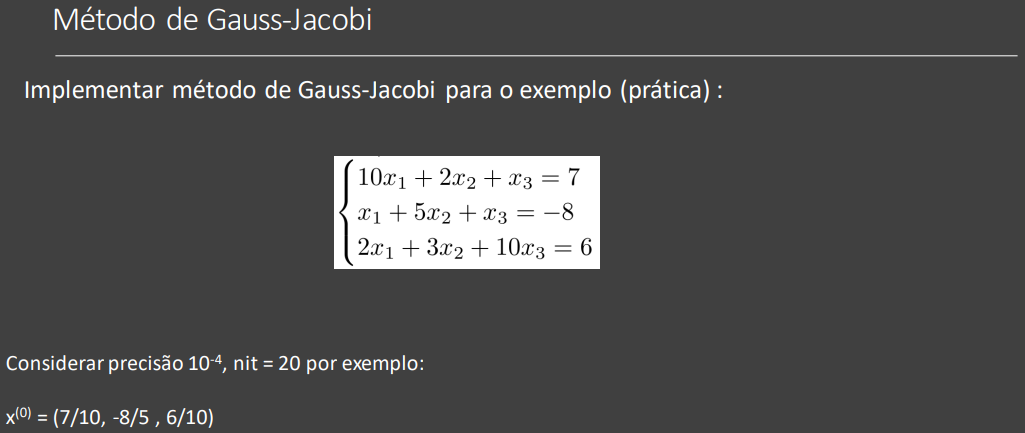

In [3]:
e  = 1e-4
k = 20

A = [[10, 2, 1],
     [1, 5, 1],
     [2, 3, 10]]
b = [7, -8, 6]

x, n = gaussjacobi(A, b, k, e)
print('Em %d iterações e %.4f de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Jacobi) são, respectivamente: %s' %(n, e, x))

Em 9 iterações e 0.0001 de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Jacobi) são, respectivamente: [1.0000102696, -1.9999839616, 1.0000146624]


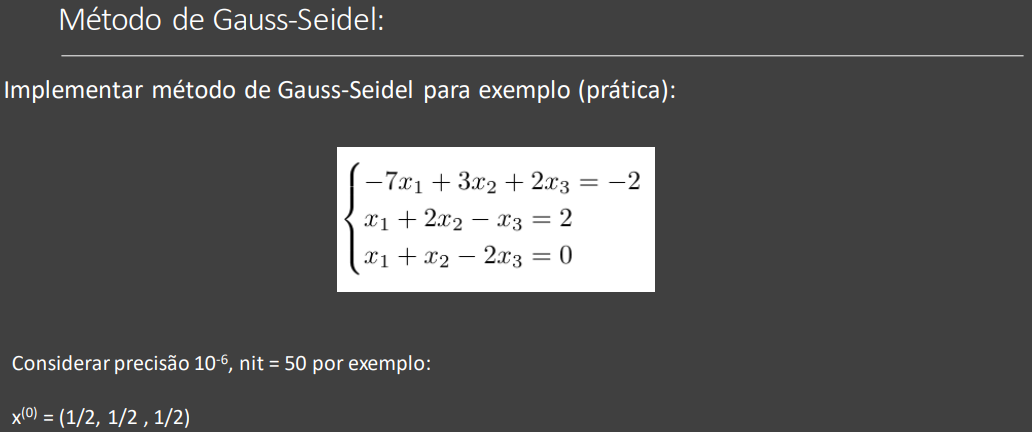

In [4]:
e = 1e-6
k = 50

A = [[-7, 3, 2],
     [1, 2, -1],
     [1, 1, -2]]
b = [-2, 2, 0]

x, n = gaussseidel(A, b, k, e)
print('Em %d iterações e %.6f de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Seidel) são, respectivamente: %s' %(n, e, x))

Em 16 iterações e 0.000001 de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Seidel) são, respectivamente: [0.9999992276192863, 0.9999996684544659, 0.9999994480368761]


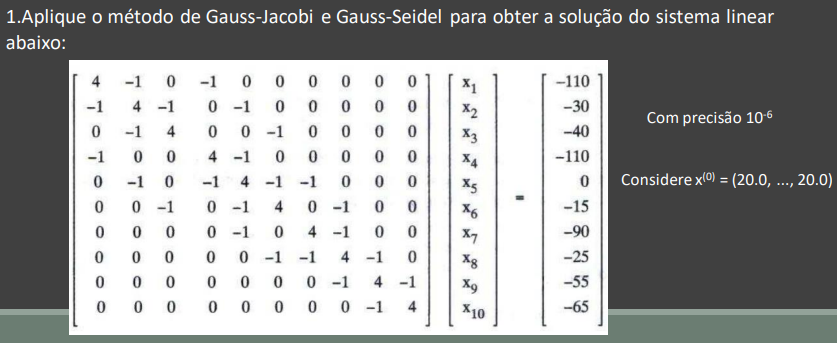

In [5]:
e  = 1e-6
k = 50

A = [[4, -1, 0, -1, 0, 0, 0, 0, 0, 0],
     [-1, 4, -1, 0, -1, 0, 0, 0, 0, 0],
     [0, -1, 4, 0, 0, -1, 0, 0, 0, 0],
     [-1, 0, 0, 4, -1, 0, 0, 0, 0, 0],
     [0, -1, 0, -1, 4, -1, -1, 0, 0, 0],
     [0, 0, -1, 0, -1, 4, 0, -1, 0, 0],
     [0, 0, 0, 0, -1, 0, 4, -1, 0, 0],
     [0, 0, 0, 0, 0, -1, -1, 4, -1, 0],
     [0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
     [0, 0, 0, 0, 0, 0, 0, 0, -1, 4]]
b = [-110, -30, -40, -110, 0, -15, -90, -25, -55, -65]
x = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

x, n = gaussjacobi(A, b, k, e)
print('Em %d iterações e %.6f de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Jacobi) são, respectivamente: %s' %(n, e, x))
print('------------------------------------------------------------------------------------------------------------------------------------------')
x, n = gaussseidel(A, b, k, e)
print('Em %d iterações e %.6f de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Seidel) são, respectivamente: %s' %(n, e, x))

Em 44 iterações e 0.000001 de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Jacobi) são, respectivamente: [-48.64641137964195, -35.4947907249296, -25.61573995126801, -49.090855804230266, -37.71701252473399, -26.96817029377317, -39.314235373073835, -29.539929716718092, -26.877314489542904, -22.969328571626058]
------------------------------------------------------------------------------------------------------------------------------------------
Em 24 iterações e 0.000001 de precisão, os valores de x1, x2 e x3 que resolvem o sistema linear (Método Gauss-Seidel) são, respectivamente: [-48.64641115467656, -35.49479072342286, -25.615740253898007, -49.090855803146695, -37.71701304765793, -26.968170834956773, -39.314235771482274, -29.539930317892686, -26.8773147460439, -22.969328686510977]
